# Different Types of Error

In the first notebook, we created some fake data with gaussian/normal noise as error.
Let's take a look at how that error affects the outcome of our fit (aside from just changing the uncertainties).

In [1]:
#Imports
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
import scipy.stats as stat

### Setup

We'll start with a similar setup to our original as a sort of control for our experiment. 
The code will look roughly the same, but I haven't made it runnable because I want to reorganize it.

We're going to do something a bit different this time, however.
I've already seen this curve, so that's not really what I'm after here.
What I'd like to see is what happens if I run this code several times.

In [2]:
#Run once:
xdata = np.linspace(0,5,50)
g_ydata = np.zeros(len(xdata))
def f(x,a,b,c):  
    return a*x**2+b*x+c
ycurve = xdata**2
l_mod = lf.Model(f)
params = l_mod.make_params(a=1, b=0, c=0)
a = np.zeros(1000)    #Make empty arrays to define later.
b = np.zeros(len(a))
c = np.zeros(len(a))
a_bins = np.linspace(0.75,1.25,50)  #An array centered on the expected value for a.
b_bins = np.linspace(-1,1,50) #With room on each side for error.
c_bins = np.linspace(-1,1,50) #And a decent length for our plot.

#Run many times:
i = 0
while i < len(a): #This will run as many times as there are elements in a.
    g_noise = np.random.normal(0,1,len(xdata))  
    for j,n in enumerate(xdata):
        g_ydata[j] = n**2+g_noise[j]
    g_sigdata = np.ones(len(xdata))
    g_weighdata = 1/g_sigdata
    l_fit = l_mod.fit(g_ydata, params, x=xdata, weights=g_weighdata)
    l_dict = l_fit.best_values
    l_a = l_dict['a']
    a[i] = l_a        #Make the ith entry in a equal to the a we found for the ith run.
    l_b = l_dict['b']
    b[i] = l_b
    l_c = l_dict['c']
    c[i] = l_c
    i += 1
    
#Save a curve from average:
g_curve = np.mean(a)*xdata**2+np.mean(b)*xdata+np.mean(c)

Now let's see how these value distributions look.

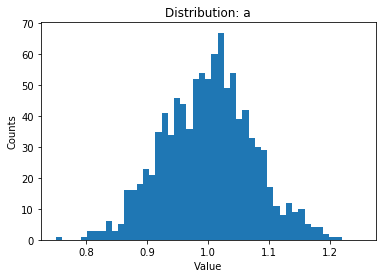

Average: 0.9996563617697368


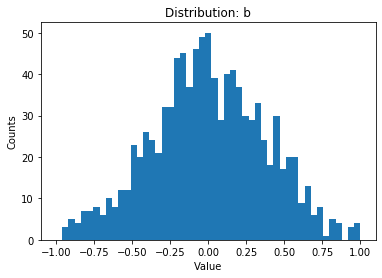

Average: 0.0005342106761348684


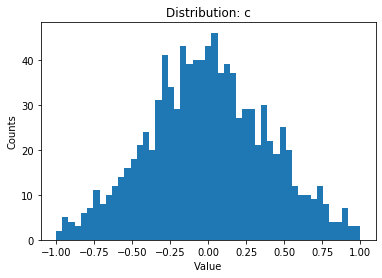

Average: -0.0009077063937665866


In [3]:
#Plotting
plt.subplot(111)             #This will allow us to create multiple, separate plots.
plt.hist(a,bins=a_bins)      #The bins sort similar values together.
plt.title('Distribution: a') #Title the plot
plt.xlabel('Value')          #Label the x-axis
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(a))) #Below the plot, print the average value of a that we fitted for.

plt.subplot(111)
plt.hist(b,bins=b_bins)      #Without grouping similar values, we would probably have only one occurrence for each
plt.title('Distribution: b')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(b)))

plt.subplot(111)
plt.hist(c,bins=c_bins)      #The bins also happen to determine the range over which we plot.
plt.title('Distribution: c')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(c)))

Not perfect, but these outputs are reasonably symmetric, and we can tell where the peaks would be. 
They also taper off quite nicely. So, we can reasonably assume that our fit will tend toward the correct values.
And, if we take a look at our averages for each array, they're similar to the expected values!

If you want to check the regions outside of what's visible in these plots, feel free to change the ranges on the bin arrays. 
(For example, you could plot from b = -2 to 2 by setting b_bin=np.linspace(-2,2,100).)

### Non-Gaussian Error

What happens to our values if our error isn't gaussian?
There are a few cases where this might occur:
- The probability doesn't taper off as quickly as a gaussian's, so we are more likely to have outliers.
- We are more likely to have error that gives us higher values than lower values, or vice versa.

Let's do the same plot with another noise distribution, the Standard Cauchy Distribution.</br>
Like the gaussian above, the error is centered on zero. 
The thing most analogous to the width is set to be 1, so we should have settings that are roughly analogous to those we used before.</br>
The Cauchy distribution, however, is very unlike the Gaussian distribution in that it isn't normalized; if we integrate it over -∞ to ∞, we will find that the integral isn't convergent.
In fact, the Cauchy distribution has no mean at all!

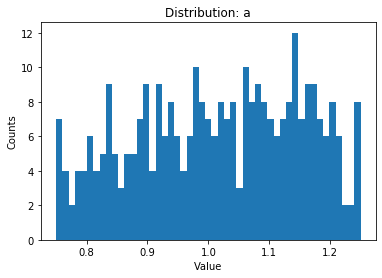

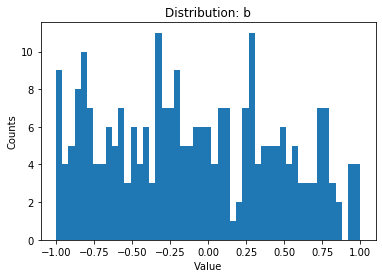

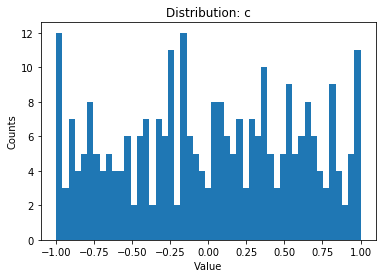

In [4]:
#Setup - run once:
#xdata was already defined, so I've removed it here.
c_ydata = np.zeros(len(xdata)) #I've used the "c" prefix to indicate "Cauchy"
#f, ycurve, lmod, and params were already defined, so I've removed them here.
#a, b, c, and their bins are already defined, so I've removed them here.

#Setup - loop:
i = 0
while i < len(a):
    c_noise = np.random.standard_cauchy(len(xdata)) #This distribution won't vanish as quickly as the gaussian does at its extremes.
    for j,n in enumerate(xdata):
        c_ydata[j] = n**2+c_noise[j]
    c_sigdata = np.ones(len(xdata))
    c_weighdata = 1/c_sigdata
    l_fit = l_mod.fit(c_ydata, params, x=xdata, weights=c_weighdata)
    l_dict = l_fit.best_values
    l_a = l_dict['a']
    a[i] = l_a       #We're overwriting a here because we won't need the old one again.
    l_b = l_dict['b']
    b[i] = l_b
    l_c = l_dict['c']
    c[i] = l_c
    i += 1

#Save a curve from average:
c_curve = np.mean(a)*xdata**2+np.mean(b)*xdata+np.mean(c)
    
#Plotting
plt.subplot(111)
plt.hist(a,bins=a_bins)
plt.title('Distribution: a')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

plt.subplot(111)
plt.hist(b,bins=b_bins)
plt.title('Distribution: b')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

plt.subplot(111)
plt.hist(c,bins=c_bins)
plt.title('Distribution: c')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

As we can see, the range of values must be greater. This makes sense given that the distribution has wider tails.
Let's try to find a range that works.

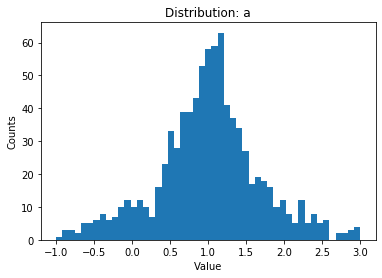

Average: 1.5392402728984944


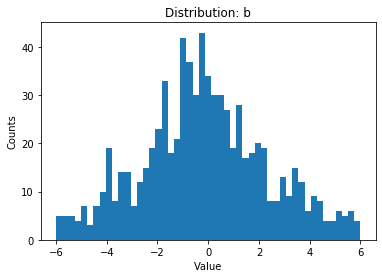

Average: -0.7052758279054229


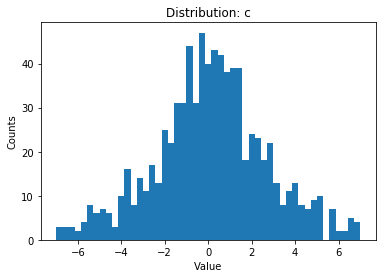

Average: -3.5617887162926025


In [5]:
#New bins
a_bins = np.linspace(-1,3,50)
b_bins = np.linspace(-6,6,50)
c_bins = np.linspace(-7,7,50)

#Plotting
plt.subplot(111)
plt.hist(a,bins=a_bins)             #Removing "bins=str" allows python to auto-assign.
plt.title('Distribution: a')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(a)))

plt.subplot(111)
plt.hist(b,bins=b_bins)
plt.title('Distribution: b')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(b)))

plt.subplot(111)
plt.hist(c,bins=c_bins)
plt.title('Distribution: c')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(c)))

These ranges are *much* wider than they were for the gaussian.
Not only that, but you may notice -- depending on your luck -- that the averages aren't good.</br>
(When I ran this, I got a = 0.5, b = 3, and c = -2.5. Our expected values are a = 1, b = 0, c = 0. Those are way off, despite us having 1000 runs of fake data!)

### Skewed Distribution

Now let's take a look at the case where our noise is skewed.
We will, again, make our distribution otherwise as analogous to our existing distributions as possible.

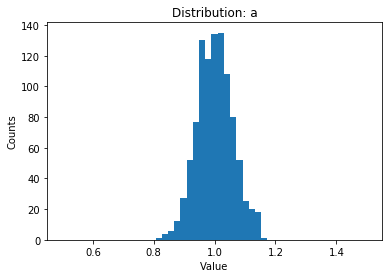

Average: 1.0015300006200354


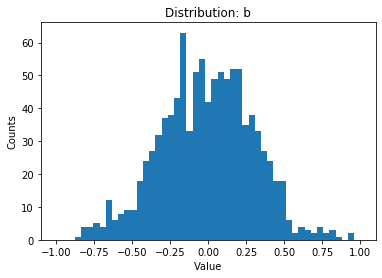

Average: -0.008524415462746458


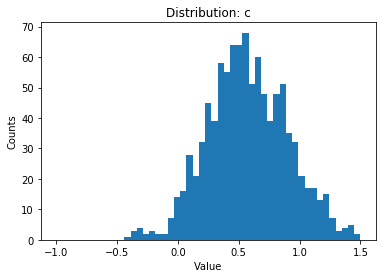

Average: 0.5790802921015813


In [6]:
#Setup - run once:
s_ydata = np.zeros(len(xdata)) #I've used the "s" prefix to indicate "skewed"

#Setup - loop:
i = 0
while i < len(a):
    s_noise = stat.skewnorm.rvs(1,size=len(xdata)) #This distribution will be skewed toward higher values.
    for j,n in enumerate(xdata):
        s_ydata[j] = n**2+s_noise[j]
    s_sigdata = np.ones(len(xdata))
    s_weighdata = 1/s_sigdata
    l_fit = l_mod.fit(s_ydata, params, x=xdata, weights=s_weighdata)
    l_dict = l_fit.best_values
    l_a = l_dict['a']
    a[i] = l_a       #We're overwriting a here because we won't need the old one again.
    l_b = l_dict['b']
    b[i] = l_b
    l_c = l_dict['c']
    c[i] = l_c
    i += 1

#Save a curve from average:
s_curve = np.mean(a)*xdata**2+np.mean(b)*xdata+np.mean(c)
    
#New bins
a_bins = np.linspace(0.5,1.5,50)
b_bins = np.linspace(-1,1,50)
c_bins = np.linspace(-1,1.5,50)

#Plotting
plt.subplot(111)
plt.hist(a,bins=a_bins)
plt.title('Distribution: a')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(a)))

plt.subplot(111)
plt.hist(b,bins=b_bins)
plt.title('Distribution: b')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(b)))

plt.subplot(111)
plt.hist(c,bins=c_bins)
plt.title('Distribution: c')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()
print("Average: "+str(np.mean(c)))

Our parameters a and b don't look too bad. 
They have roughly the same range that was used for the gaussian fit, well-centered, and somewhat symmetric.
The parameter c also looks like it has a roughly defined center, and that distribution is symmetric as well.
However, while a and b are close to their true values, c is pretty far off.
This makes sense give that c is the vertical offset of the function, 
while a and b have to do with how the function scales relative to x.

### Comparison

We have what should be roughly the same sets of data with different types of error.
Let's plot for a visual side-by-side comparison.

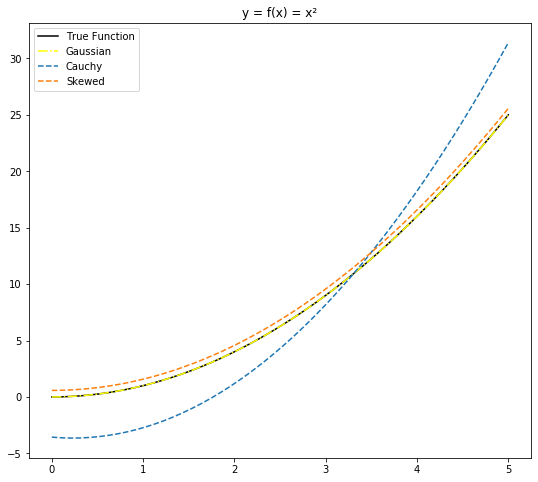

In [7]:
#Plotting
fig = plt.figure(figsize=(9.0,8.0))

plt.plot(xdata,ycurve,color='black',label='True Function')
plt.plot(xdata,g_curve,color='yellow',linestyle='-.',label='Gaussian') #Formatted differently for visibility of ycurve
plt.plot(xdata,c_curve,linestyle='--',label='Cauchy')
plt.plot(xdata,s_curve,linestyle='--',label='Skewed')
#plt.plot(xdata,g_ydata,'bo',label='Data (Gaussian Noise)') #Uncomment any of these to see the data
#plt.plot(xdata,c_ydata,'bo',label='Data (Cauchy Noise)')
#plt.plot(xdata,s_ydata,'bo',label='Data (Skewed Noise)')
plt.title('y = f(x) = x\u00b2')

plt.legend()
plt.show()

With many data runs, our gaussian-error fit is right on top of the true function.
The skewed-error fit rests just above them and has a very similar shape.
Our Cauchy-error fit is not correct at all.

So what's the solution? With real data, we typically can't control what our uncertainties look like.
Least-squares can only use gaussian error, so we'll have to look into other methods next.